## Createing a Timeseries at a Point
#### Author: Rishi Anand

In [1]:
import xarray as xr
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import s3fs

In [2]:
# Set up the s3 filesystem
s3 = s3fs.S3FileSystem({'anon':True})
# Select the months of interest and store them
months = ['201501', '201502']

It is possible that the process for plotting more than a few points will take some time - about 3-5 seconds per file.

In [3]:
# Select a point (north_south, east_west) format
ns = 5000
ew = 5000
# datapoints is the list of values and y-axis
datapoints = []
# dates stores the date values for each point, and will label the x-axis
dates = []
var = 'Tair'
for month in months:
    # Retrieve the list of files for month 'month'
    files = s3.ls('nasa-waterinsight/NLDAS3/forcing/hourly/'+month+'/')
    for file in files:
        with s3.open(file) as infile:
            # Extract the date from the filename in yyyymmdd format
            date = file[-20:-12]
            dates.append(date)
            # Open the file and store the data for variable 'var' at point (ns, ew)
            ds = xr.open_dataset(infile, engine="h5netcdf")[var]
            print(date)
            datapoints.append(ds.isel(time=0, lon=ew, lat=ns).to_numpy())
            #print(datapoints)

20150101
20150102
20150103
20150104
20150105
20150106
20150107
20150108
20150109
20150110
20150111
20150112
20150113
20150114
20150115
20150116
20150117
20150118
20150119
20150120
20150121
20150122
20150123
20150124
20150125
20150126
20150127
20150128
20150129
20150130
20150131
20150201
20150202
20150203
20150204
20150205
20150206
20150207
20150208
20150209
20150210
20150211
20150212
20150213
20150214
20150215
20150216
20150217
20150218
20150219
20150220
20150221
20150222
20150223
20150224
20150225
20150226
20150227
20150228


Text(0, 0.5, 'Air Temp. (K)')

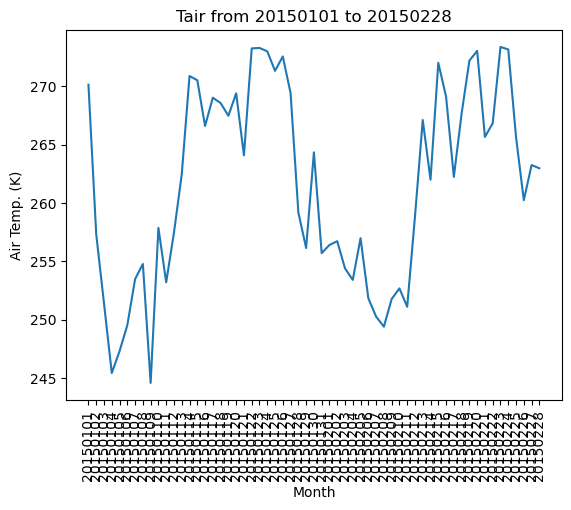

In [4]:
plt.plot(dates, datapoints)
plt.title(var + ' from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Air Temp. (K)')